## 1. Importing all necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. Loading Dataset

In [4]:
athlete=pd.read_csv("Olympic_Athletes.zip")

In [5]:
athlete.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## 3. Data Selection and Filtering

In [7]:
athlete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [8]:
athlete.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


### -> Handle null values and remove unwanted symbols

In [10]:
athlete.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [11]:
athlete.shape

(271116, 15)

In [12]:
athlete["Age"]=athlete["Age"].fillna(athlete["Age"].median())
athlete["Height"]=athlete["Height"].fillna(athlete["Height"].median())
athlete["Weight"]=athlete["Weight"].fillna(athlete["Weight"].median())

In [13]:
athlete["Medal"]=athlete["Medal"].fillna("None")

In [14]:
athlete.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

In [15]:
athlete.duplicated().sum()

np.int64(1385)

### -> Unique count of Sports, events, city and Teams participated in Olympics

In [17]:
len(athlete["Sport"].unique())

66

In [18]:
len(athlete["Event"].unique())

765

In [19]:
len(athlete["City"].unique())

42

In [20]:
len(athlete["Team"].unique())

1184

### -> Total Counts of the Players from the Finland, Norway, United States, Netherland, France

In [22]:
athlete["Team"].value_counts()[["Finland", "Norway", "United States","Netherlands", "France"]]

Team
Finland           5379
Norway            4708
United States    17847
Netherlands       5718
France           11988
Name: count, dtype: int64

In [23]:
athlete['Team']

0                  China
1                  China
2                Denmark
3         Denmark/Sweden
4            Netherlands
               ...      
271111          Poland-1
271112            Poland
271113            Poland
271114            Poland
271115            Poland
Name: Team, Length: 271116, dtype: object

In [24]:
athlete[['Name', 'Sport']]

,Name,Sport
0,A Dijiang,Basketball
1,A Lamusi,Judo
2,Gunnar Nielsen Aaby,Football
3,Edgar Lindenau Aabye,Tug-Of-War
4,Christine Jacoba Aaftink,Speed Skating
...,...,...
271111,Andrzej ya,Luge
271112,Piotr ya,Ski Jumping
271113,Piotr ya,Ski Jumping
271114,Tomasz Ireneusz ya,Bobsleigh


In [25]:
athlete[(athlete['Medal'] == 'Gold') & (athlete['Year'] > 2000)]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
73,20,Kjetil Andr Aamodt,M,30.0,176.0,85.0,Norway,NOR,2002 Winter,2002,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Super G,Gold
76,20,Kjetil Andr Aamodt,M,30.0,176.0,85.0,Norway,NOR,2002 Winter,2002,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Combined,Gold
78,20,Kjetil Andr Aamodt,M,34.0,176.0,85.0,Norway,NOR,2006 Winter,2006,Winter,Torino,Alpine Skiing,Alpine Skiing Men's Super G,Gold
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,70.0,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold
172,72,Aleksey Aleksandrovich Abalmasov,M,28.0,180.0,83.0,Belarus,BLR,2008 Summer,2008,Summer,Beijing,Canoeing,"Canoeing Men's Kayak Fours, 1,000 metres",Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270609,135343,Aleksandr Yuryevich Zubkov,M,39.0,189.0,102.0,Russia-1,RUS,2014 Winter,2014,Winter,Sochi,Bobsleigh,Bobsleigh Men's Two,Gold
270610,135343,Aleksandr Yuryevich Zubkov,M,39.0,189.0,102.0,Russia-1,RUS,2014 Winter,2014,Winter,Sochi,Bobsleigh,Bobsleigh Men's Four,Gold
270934,135488,Nataliya Vladimirovna Zuyeva,F,19.0,176.0,62.0,Russia,RUS,2008 Summer,2008,Summer,Beijing,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Group,Gold
270981,135503,Zurab Zviadauri,M,23.0,182.0,90.0,Georgia,GEO,2004 Summer,2004,Summer,Athina,Judo,Judo Men's Middleweight,Gold


In [26]:
athlete.groupby('Team')['Medal'].count()
athlete.groupby(['Year', 'Team'])['Medal'].count().unstack()

athlete.sort_values(by='Year', ascending=False).head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
80,22,Andreea Aanei,F,22.0,170.0,125.0,Romania,ROU,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight,None
271110,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,None
122244,61795,Pavel Sergeyevich Kochetkov,M,30.0,184.0,72.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Cycling,Cycling Men's Individual Time Trial,None
122243,61795,Pavel Sergeyevich Kochetkov,M,30.0,184.0,72.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Cycling,"Cycling Men's Road Race, Individual",None
82092,41686,Daniel Goodfellow,M,19.0,167.0,58.0,Great Britain,GBR,2016 Summer,2016,Summer,Rio de Janeiro,Diving,Diving Men's Synchronized Platform,Bronze
170504,85686,Deo Gracia Ngokaba,M,19.0,190.0,140.0,Congo (Brazzaville),CGO,2016 Summer,2016,Summer,Rio de Janeiro,Judo,Judo Men's Heavyweight,None
170509,85690,Victoire Pauline L'or Ngon Ntame,F,30.0,177.0,79.0,Cameroon,CMR,2016 Summer,2016,Summer,Rio de Janeiro,Volleyball,Volleyball Women's Volleyball,None
170565,85712,Marcel Van Minh Phuc Long Nguyen,M,28.0,165.0,55.0,Germany,GER,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Pommelled Horse,None
170475,85662,Mpi Anauel Ngamissengue,M,20.0,170.0,70.0,Congo (Brazzaville),CGO,2016 Summer,2016,Summer,Rio de Janeiro,Boxing,Boxing Men's Middleweight,None
233799,117258,Ondej Synek,M,33.0,199.0,105.0,Czech Republic,CZE,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Single Sculls,Bronze


## 4. Data Visualization

C:\Users\AKSHAT KUMAR\AppData\Local\Temp\ipykernel_17636\3738288081.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


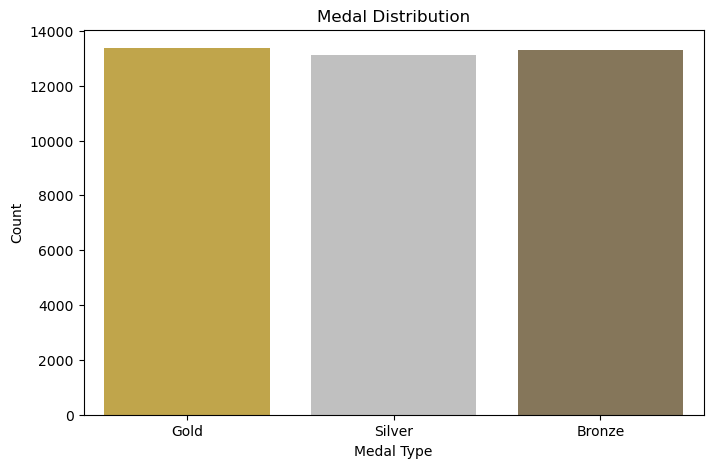

In [28]:
plt.figure(figsize=(8, 5))
sns.countplot(
    x='Medal',
    data=athlete,
    order=['Gold', 'Silver', 'Bronze'],
    palette=['#D4AF37', '#C0C0C0', '#8C7853']
)
plt.title('Medal Distribution')
plt.xlabel('Medal Type')
plt.ylabel('Count')
plt.show()


### ->Top 10 Countries by Medal Count

C:\Users\AKSHAT KUMAR\AppData\Local\Temp\ipykernel_17636\3771877684.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_teams.values, y=top_teams.index, palette='coolwarm')


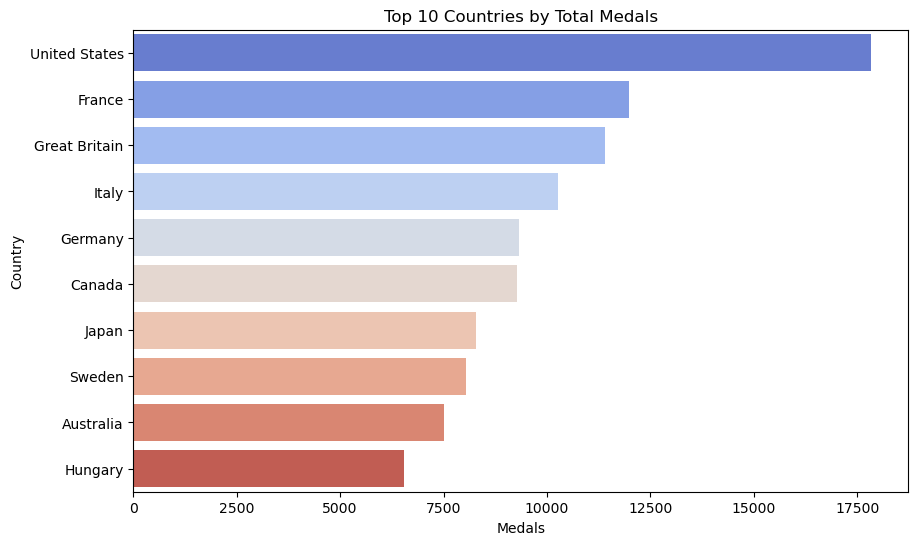

In [30]:
top_teams = athlete['Team'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_teams.values, y=top_teams.index, palette='coolwarm')
plt.title('Top 10 Countries by Total Medals')
plt.xlabel('Medals')
plt.ylabel('Country')
plt.show()

### ->Gold Medals by Country (Top 10)

C:\Users\AKSHAT KUMAR\AppData\Local\Temp\ipykernel_17636\760634733.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_gold.values, y=top_gold.index, palette=['#D4AF37'])
C:\Users\AKSHAT KUMAR\AppData\Local\Temp\ipykernel_17636\760634733.py:4: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=top_gold.values, y=top_gold.index, palette=['#D4AF37'])


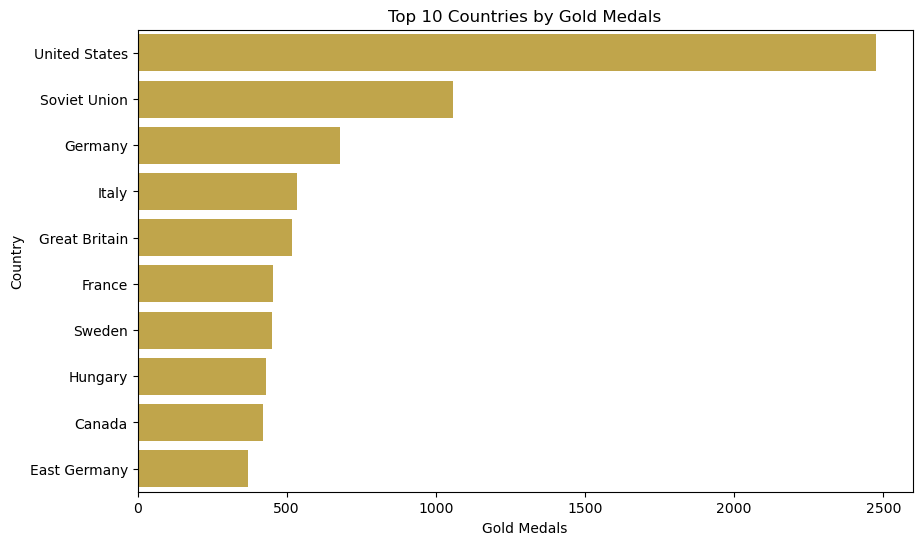

In [86]:
gold = athlete[athlete['Medal'] == 'Gold']
top_gold = gold['Team'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_gold.values, y=top_gold.index, palette=['#D4AF37'])
plt.title('Top 10 Countries by Gold Medals')
plt.xlabel('Gold Medals')
plt.ylabel('Country')
plt.show()

### ->Age distribution of Athletes

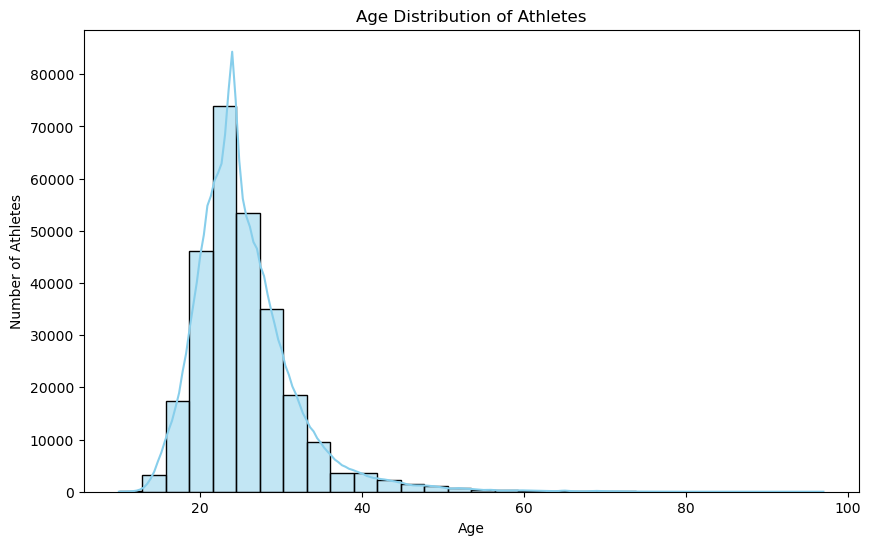

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(athlete['Age'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Athletes')
plt.xlabel('Age')
plt.ylabel('Number of Athletes')
plt.show()

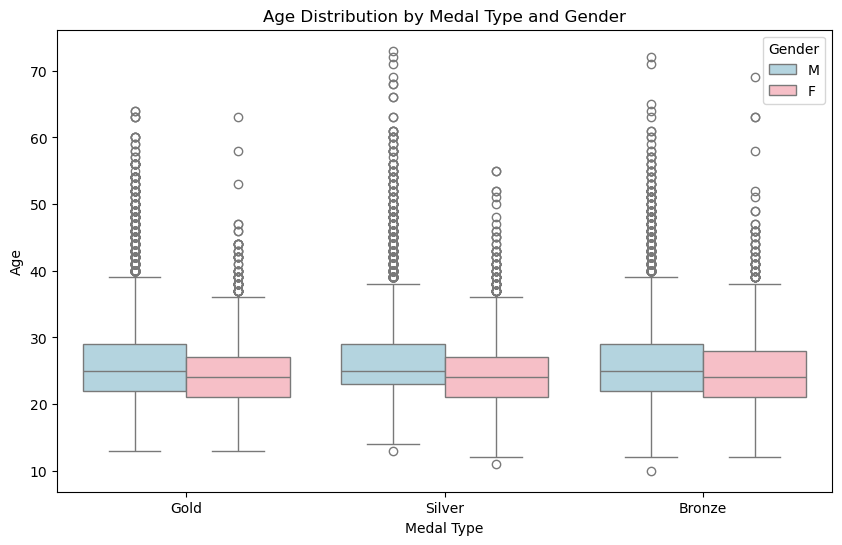

In [79]:
# boxplot
box_data = athlete[['Medal', 'Age', 'Sex']].dropna()
plt.figure(figsize=(10, 6))
sns.boxplot(x='Medal', y='Age', hue='Sex', data=box_data, order=['Gold', 'Silver', 'Bronze'],
            palette={'M': 'lightblue', 'F': 'lightpink'})
plt.title('Age Distribution by Medal Type and Gender')
plt.xlabel('Medal Type')
plt.ylabel('Age')
plt.legend(title='Gender')
plt.show()

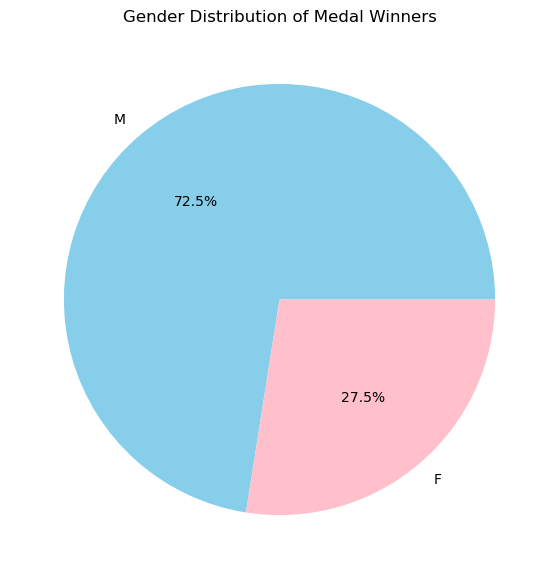

In [83]:
# pie chart
medal_gender = athlete[athlete['Medal'].notnull()]
gender_counts = medal_gender['Sex'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['skyblue', 'pink'])
plt.title('Gender Distribution of Medal Winners')
plt.show()

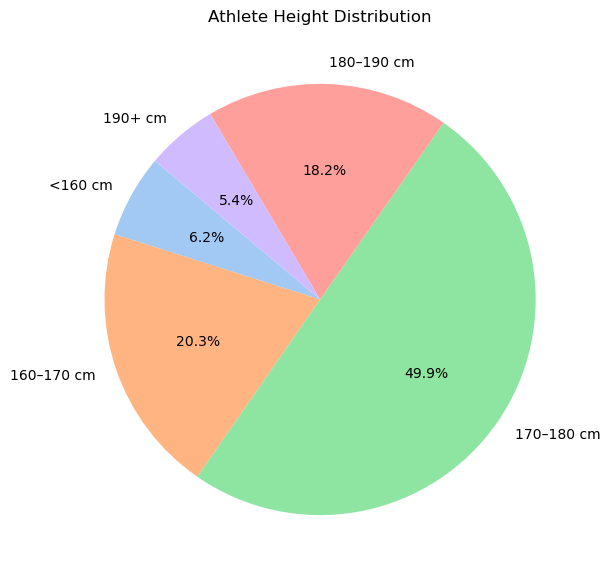

In [88]:
# on the basis of height
height_data = athlete['Height'].dropna()
height_bins = [0, 160, 170, 180, 190, 300]
height_labels = ['<160 cm', '160–170 cm', '170–180 cm', '180–190 cm', '190+ cm']
height_categories = pd.cut(height_data, bins=height_bins, labels=height_labels)
height_counts = height_categories.value_counts().sort_index()
plt.figure(figsize=(7, 7))
plt.pie(height_counts, labels=height_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Athlete Height Distribution')
plt.show()

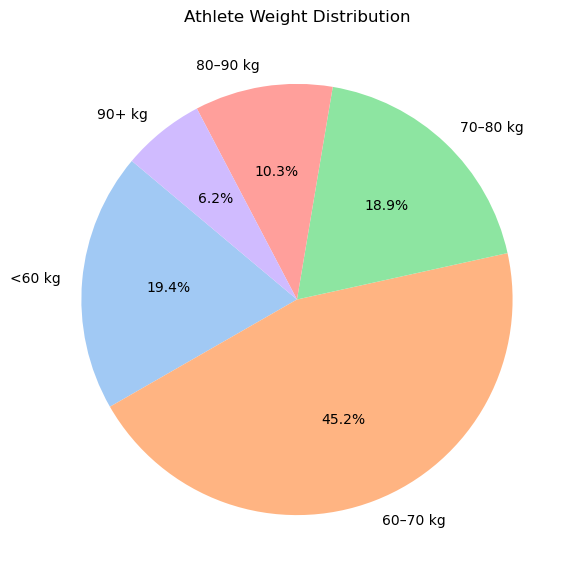

In [90]:
# on the basis of weights
weight_data = athlete['Weight'].dropna()
weight_bins = [0, 60, 70, 80, 90, 200]
weight_labels = ['<60 kg', '60–70 kg', '70–80 kg', '80–90 kg', '90+ kg']
weight_categories = pd.cut(weight_data, bins=weight_bins, labels=weight_labels)
weight_counts = weight_categories.value_counts().sort_index()
plt.figure(figsize=(7, 7))
plt.pie(weight_counts, labels=weight_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Athlete Weight Distribution')
plt.show()

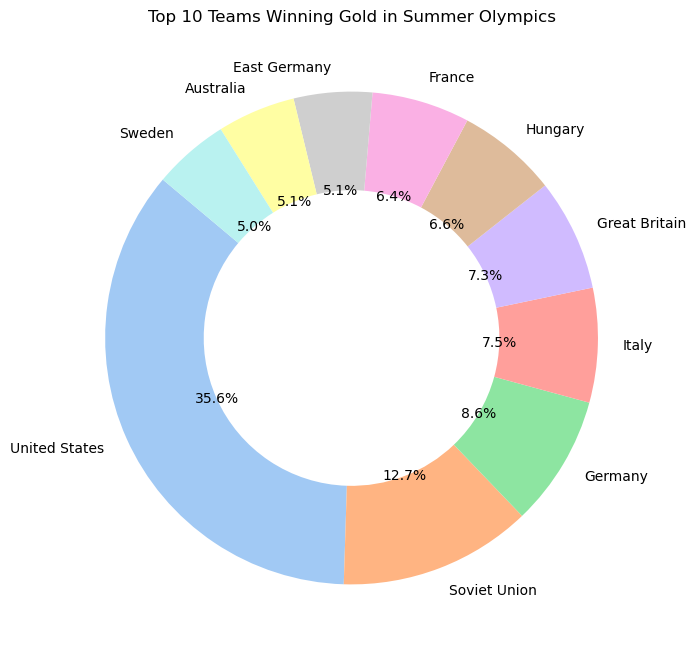

In [92]:
gold_summer = athlete[(athlete['Medal'] == 'Gold') & (athlete['Season'] == 'Summer')]
top_teams = gold_summer['Team'].value_counts().head(10)
plt.figure(figsize=(8, 8))
colors = sns.color_palette('pastel')[:10]
plt.pie(top_teams, labels=top_teams.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops=dict(width=0.4))
plt.title('Top 10 Teams Winning Gold in Summer Olympics')
plt.show()

### 5. Categorical Encoding -> It's the process of converting categorical values (strings) into numeric format so machines can understand them.

In [63]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
athlete['Medal_Encoded'] = le.fit_transform(athlete['Medal'])

In [75]:
athlete[['Medal', 'Medal_Encoded']].head(50)

,Medal,Medal_Encoded
0,None,2
1,None,2
2,None,2
3,Gold,1
4,None,2
5,None,2
6,None,2
7,None,2
8,None,2
9,None,2


In [77]:
# one-Hot encoding
pd.get_dummies(athlete['Medal'], prefix='Medal')

,Medal_Bronze,Medal_Gold,Medal_None,Medal_Silver
0,False,False,True,False
1,False,False,True,False
2,False,False,True,False
3,False,True,False,False
4,False,False,True,False
...,...,...,...,...
271111,False,False,True,False
271112,False,False,True,False
271113,False,False,True,False
271114,False,False,True,False
